# Data collection

In [1]:
import os
os.chdir('D:/py/')
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# EDA

In [3]:
df1=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df1.shape

(200, 4)

In [6]:
df1.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df1.corr()['Sales']

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

In [8]:
df1.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [9]:
df1.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df1.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

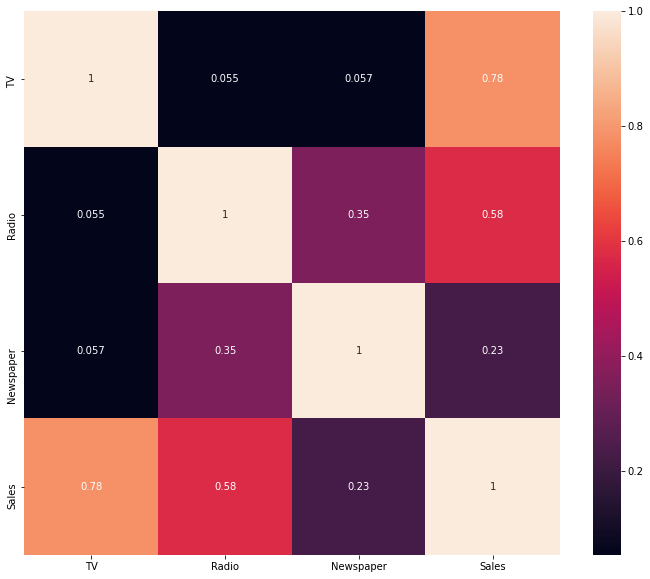

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

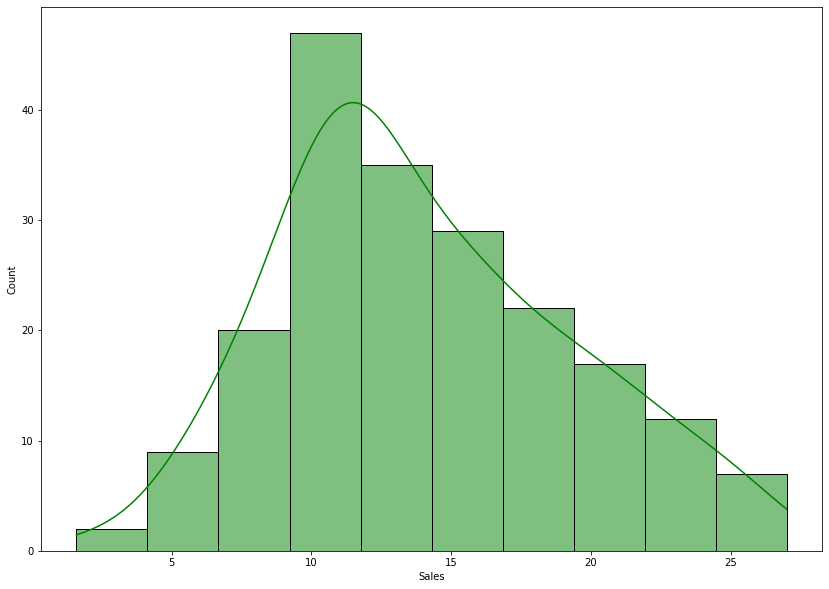

In [14]:
plt.figure(figsize=(14, 10))
sns.histplot(df1['Sales'],kde=True, bins=10 ,color='green')
plt.show()

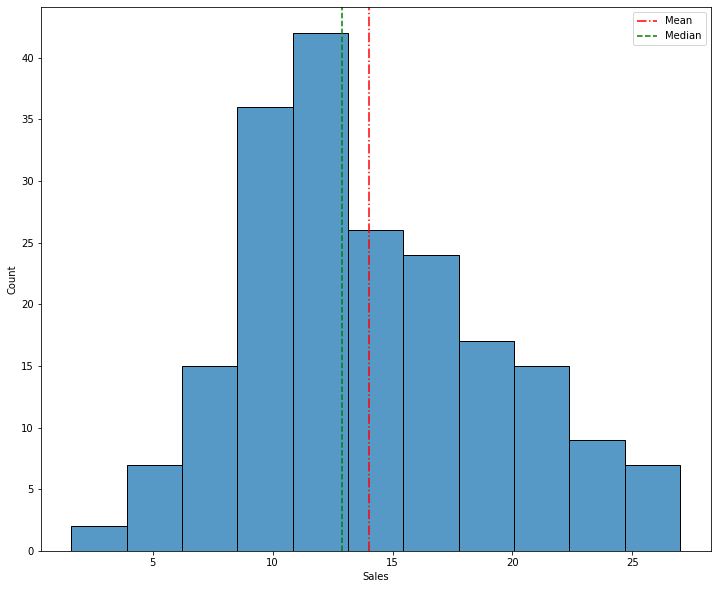

In [15]:
plt.figure(figsize=(12, 10))
sns.histplot(df1['Sales'])
plt.axvline(df1['Sales'].mean(), color='Red',label='Mean',linestyle='dashdot')
plt.axvline(df1['Sales'].median(), color='Green',label='Median',linestyle='dashed')
plt.legend()
plt.show()

# Define x and y

In [16]:
x=df1.drop(['Sales'],axis=1)
y=df1['Sales']

In [17]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# Model

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
lr.fit(x_train, y_train)

LinearRegression()

# Evalution on traing data

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred_train = lr.predict(x_train)
y_pred_train

mae=mean_absolute_error(y_pred_train,y_train)
print('Mean absolute error= ', mae)
print('_'*30)

mse=mean_squared_error(y_pred_train,y_train)
print('Mean Square error= ', mse)
print('_'*30)

rmse=mse**0.5
print('RMSE= ',rmse)
print('_'*30)

r2=r2_score(y_pred_train,y_train)
print('R2_score= ',r2)

Mean absolute error=  1.1418037434267463
______________________________
Mean Square error=  2.3180706883808355
______________________________
RMSE=  1.5225211618827619
______________________________
R2_score=  0.9098408726610763


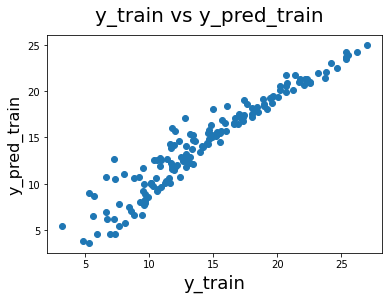

In [28]:
# Plotting y_train and y_pred_train to understand 
fig = plt.figure()
plt.scatter(y_train,y_pred_train)
fig.suptitle('y_train vs y_pred_train', fontsize=20)               
plt.xlabel('y_train', fontsize=18)                         
plt.ylabel('y_pred_train', fontsize=16)  
plt.show()

# Evaltuion on testing data

In [25]:
y_pred_test = lr.predict(x_test)
y_pred_test

mae1=mean_absolute_error(y_pred_test,y_test)
print('Mean absolute error= ', mae1)
print('_'*30)

mse1=mean_squared_error(y_pred_test,y_test)
print('Mean Square error= ', mse1)
print('_'*30)

rmse1=mse1**0.5
print('RMSE= ',rmse1)
print('_'*30)

r21=r2_score(y_pred_test,y_test)
print('R2_score= ',r21)

Mean absolute error=  1.578508267847742
______________________________
Mean Square error=  4.742744613958631
______________________________
RMSE=  2.177784335961353
______________________________
R2_score=  0.75365367453228


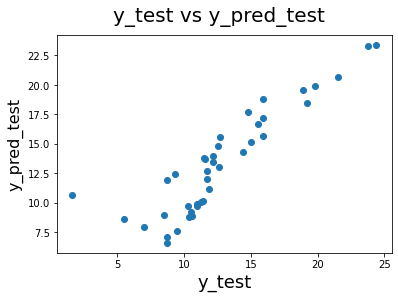

In [29]:
# Plotting y_test and y_pred_test to understand 
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred_test', fontsize=16)
plt.show()

In [27]:
data1 = pd.DataFrame(data={"Predicted Sales": y_pred_test.flatten()})
print(data1)

    Predicted Sales
0         13.675739
1          9.719656
2         13.418375
3         23.265828
4          9.210526
5         11.953830
6         10.155073
7         19.559234
8          7.913275
9          6.597091
10        17.151873
11        13.966562
12        20.627683
13        16.640574
14        12.456395
15        12.050846
16         7.137832
17        23.360729
18        19.877509
19        15.646397
20        15.175395
21         8.921214
22        14.785043
23        14.307078
24         8.996744
25         8.794972
26         8.652732
27        18.770199
28         9.738462
29         9.938627
30        11.202075
31        10.087413
32        17.714621
33        15.569077
34        12.712080
35        18.476838
36        13.049925
37        13.803748
38        10.676848
39         7.642800
